# **DSL 24-1 기초 과제 1**

### 기수 :12
### 이름 :신영군

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


필수 라이버러리 갖고오기

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cv2
import timeit
from scipy import stats

## **2-3**

해당 문제에서는 예시 사진을 이용해서 SVD-Decomposition 이 어떻게 사진을 압축하는데에 사용이 되는지 보여주고 있습니다. 본인이 선정한 사진에 SVD-Decomposition 을 활용해서 Sigma 차원을 $100$ 으로 설정할 경우 용량이 실제로 줄어드는지 확인해보겠습니다.

경로 설정 (image.jpg 경로로 바꿔주세요!)

In [8]:
path_to_image = "image.jpg"

이미지 출력해서 확인해보기 (**편의상 흑백을 사용할 예정입니다**)

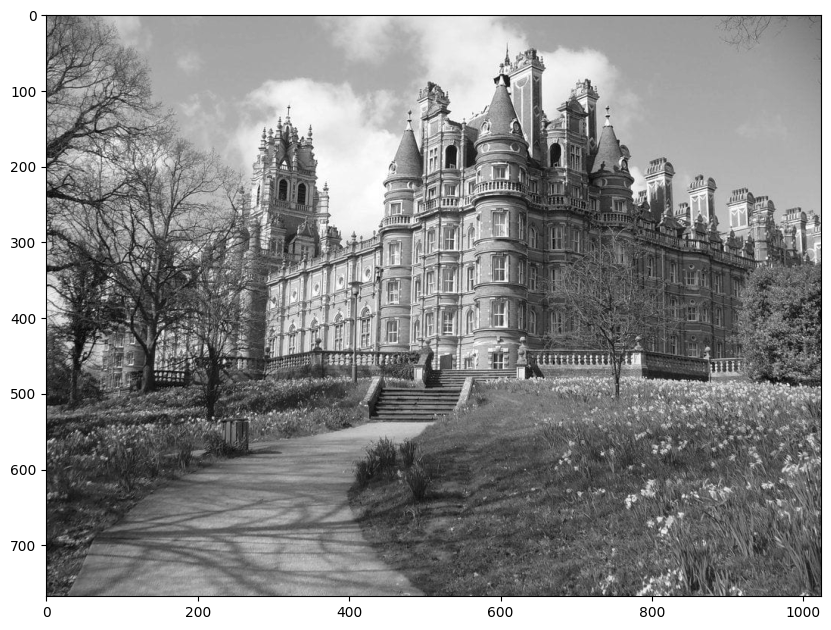

In [9]:
image = cv2.imread(path_to_image, cv2.IMREAD_GRAYSCALE)
fig = plt.figure(figsize=(10, 13))
plt.imshow(image, cmap='gray')

다음과 같이 이미지를 Float32 형태의 데이터로 바꾸겠습니다.

In [10]:
image_float = image.astype(np.float32)

그 뒤에 np.linalg.svd 를 활용해서 SVD-Decomposition 을 진행하겠습니다. 여기에서 np.linalg.svd 의 아웃풋은 $U$, 시그마 값, $V^\top$ 가 나오게 되며, 시그마 값을 이용해서 대각선에는 시그마 값들이 있으며 나머지는 $0$ 인 메트릭스를 만들겠습니다.

In [11]:
U, Sigma, Vt = np.linalg.svd(image_float)
Sigma_mat = np.zeros((image_float.shape[0], image_float.shape[1]))
np.fill_diagonal(Sigma_mat, Sigma)

# 시그마 행렬 확인 용도
print(Sigma_mat.shape)

(768, 1024)


 여기서부터는 해당 이미지에 관해서 고유벡터 $70$ 개만 쓰겠습니다. 즉(나머지 원소들은 $0$ )

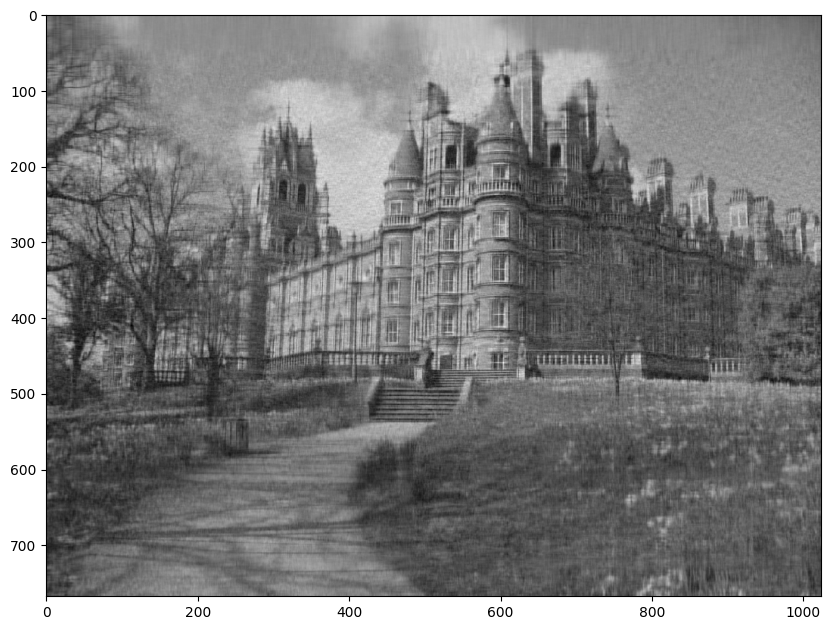

In [12]:
image_composition = np.matmul(U[:, :70], np.matmul(Sigma_mat[:70, :70], Vt[:70, :]))
fig = plt.figure(figsize=(10, 13))

plt.imshow(image_composition, cmap = 'gray')

전에 비해서 확실히 흐릿해진 모습을 보이고 있습니다. 그렇다면 해당 사진과 이전 사진과 비교해서 어떤 것이 더 많은 용량 (즉 더 많은 Non-Zero 값)을 사용하고 있는지 알아보겠습니다.

In [13]:
def count_nonzero_full_image():
    return np.count_nonzero(U) + np.count_nonzero(Sigma_mat) + np.count_nonzero(Vt)

def count_nonzero_compressed_image():
    return np.count_nonzero(U[:, :70]) + np.count_nonzero(Sigma_mat[:70, :70]) + np.count_nonzero(Vt[:70, :])

full_image_time = 0
compressed_image_time = 0

for i in range(10) :
  full_image_time += timeit.timeit(count_nonzero_full_image, number=100)
  compressed_image_time += timeit.timeit(count_nonzero_compressed_image, number=100)

print("Image Float uses ", np.count_nonzero(U) + np.count_nonzero(Sigma_mat) + np.count_nonzero(Vt), " Non-zero Elements")
print("Image Composition uses ", np.count_nonzero(U[:, :70]) + np.count_nonzero(Sigma_mat[:70, :70]) + np.count_nonzero(Vt[:70, :]), " Non-zero Elements")
print(f"Processing Time for 10 Full Images: {round(full_image_time, 5)} seconds")
print(f"Processing Time for 10 Compressed Images: {round(compressed_image_time, 5)} seconds")

Image Float uses  1639168  Non-zero Elements
Image Composition uses  125510  Non-zero Elements
Processing Time for 10 Full Images: 7.6217 seconds
Processing Time for 10 Compressed Images: 0.41529 seconds


원본과 확연히 큰 차이를 보이고 있습니다. 그럼에도 원래 이미지가 무엇을 표현하고 싶은지에 대한 정보를 여전히 포함하고 있습니다.
=> SVD-Decomposition 을 활용하면 더 적은 용량으로 원본의 정보를 살릴 수 있다!

## **문제 2-3**

아래에는 Skeleton Code 가 있습니다. 빈칸에 자기가 원하는 사진과 차원 수를 조정하면서 원본에 비해서 적은 용량을 차지하면서도 원본에 대한 정보를 유지해주세요.

In [14]:
path_to_image = "homework_image.jpg"

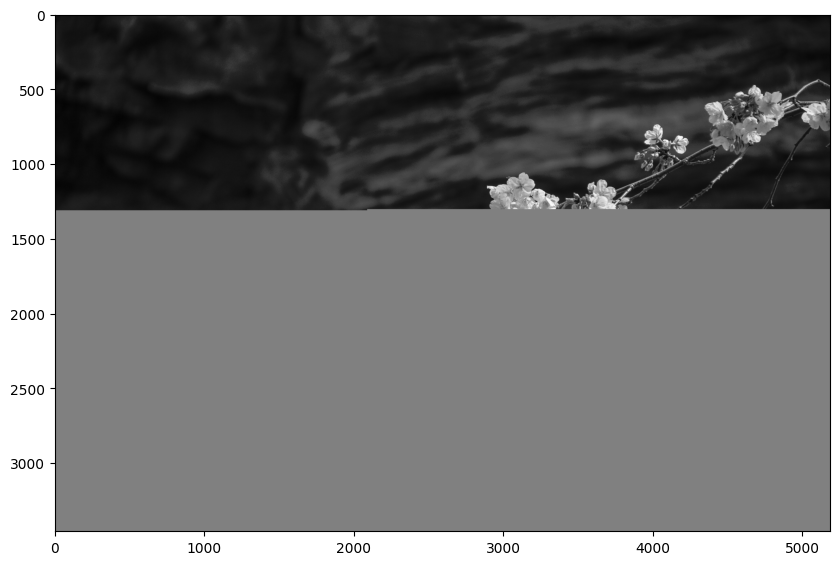

In [15]:
image = cv2.imread(path_to_image, cv2.IMREAD_GRAYSCALE)
fig = plt.figure(figsize=(10, 13))
plt.imshow(image, cmap='gray')

In [16]:
image_float = image.astype(np.float32)
U, Sigma, Vt = np.linalg.svd(image_float)
Sigma_mat = np.zeros((image_float.shape[0], image_float.shape[1]))
np.fill_diagonal(Sigma_mat, Sigma)
print("Image Float's Shape : ", image_float.shape)

Image Float's Shape :  (3456, 5184)


시그마 메트릭스 $(\Sigma)$ 차원 설정

In [17]:
num_elements = 60

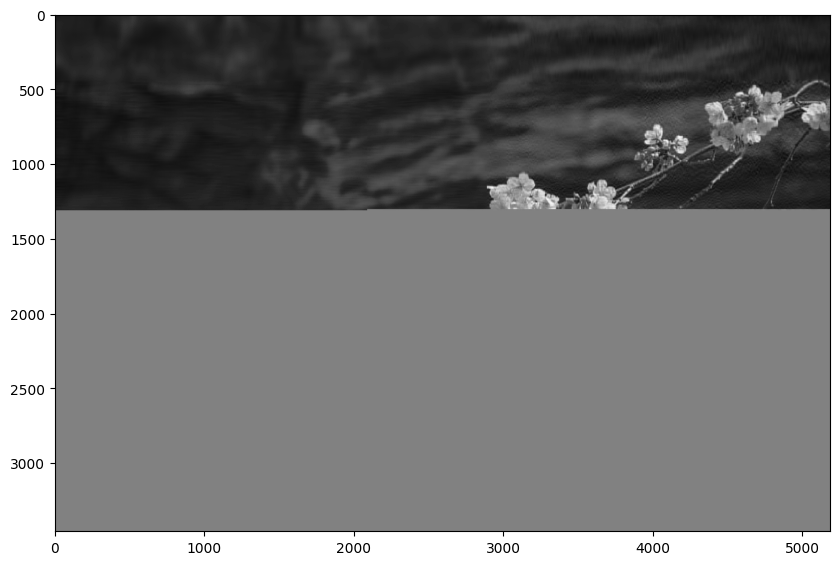

In [18]:
image_composition = np.matmul(U[:, :num_elements], np.matmul(Sigma_mat[:num_elements, :num_elements], Vt[:num_elements, :]))
fig = plt.figure(figsize=(10, 13))

plt.imshow(image_composition, cmap = 'gray')

In [19]:
full_image_time = 0
compressed_image_time = 0

for i in range(10) :
  full_image_time += timeit.timeit(count_nonzero_full_image, number=100)
  compressed_image_time += timeit.timeit(count_nonzero_compressed_image, number=100)

print("Image Float uses ", np.count_nonzero(U) + np.count_nonzero(Sigma_mat) + np.count_nonzero(Vt), " Non-zero Elements")
print("Image Composition uses ", np.count_nonzero(U[:, :70]) + np.count_nonzero(Sigma_mat[:70, :70]) + np.count_nonzero(Vt[:70, :]), " Non-zero Elements")
print(f"Processing Time for 10 Full Images: {round(full_image_time, 5)} seconds")
print(f"Processing Time for 10 Compressed Images: {round(compressed_image_time, 5)} seconds")

Image Float uses  38819827  Non-zero Elements
Image Composition uses  604870  Non-zero Elements
Processing Time for 10 Full Images: 150.26789 seconds
Processing Time for 10 Compressed Images: 2.34025 seconds


##**문제 4-1**

In [40]:
path_to_csv = "heights.csv"
data = pd.read_csv(path_to_csv)
DSL = data[data['which'] == 'DSL']
ESC = data[data['which'] == 'ESC']
Else = data[data['which'] == 'Else']

In [43]:
DSL = data[data['which'] == 'DSL']['heights']
ESC = data[data['which'] == 'ESC']['heights']

DSL = pd.to_numeric(DSL, errors='coerce')
ESC = pd.to_numeric(ESC, errors='coerce')

t_stat, p_value = stats.ttest_ind(DSL.dropna(), ESC.dropna())
print(f"t value: {t_stat}, p value: {p_value}")

t value: -2.407810555814542, p value: 0.017360261354181065


## **문제 4-2**

파이썬의 scipy.stats 을 활용해서 유의수준 5%에서의 가설검정을 수행하고 결론을 도출하시오.

heights.csv 경로 설정하기

In [20]:
path_to_csv = "heights.csv"

전처리

In [21]:
data = pd.read_csv(path_to_csv)
DSL = data[data['which'] == 'DSL']
ESC = data[data['which'] == 'ESC']
Else = data[data['which'] == 'Else']

DSL 데이터 형태

In [22]:
DSL.head()

heights which
0    181.8   DSL
1    161.3   DSL
2    177.8   DSL
3    169.1   DSL
4    181.2   DSL

ESC 데이터 형태

In [23]:
ESC.head()

heights which
78    171.1   ESC
79    159.2   ESC
80    184.9   ESC
81    176.1   ESC
82    184.8   ESC

Else 데이터 형태

In [24]:
  Else.head()

heights which
141    180.6  Else
142    169.3  Else
143    176.0  Else
144    180.3  Else
145    177.7  Else

In [31]:
f_stat, p_value = stats.f_oneway(DSL,ESC)
print(f"F value: {f_stat}, p value: {p_value}")
#the final p-value of f-test are approximately 0.0174, which is smaller than 0.05. Consequently the zero hypothesis are disapproved, mean height of each academic society differs

F value: 5.797551672692221, p value: 0.017360261354178508


## **문제 5**

파이썬의 pandas와 numpy 활용과 관련한 몇몇 예제입니다. 주어진 실행 결과와 요구하는 바에 맞게 코드를 작성하시오.

#### 6-A. Pandas

In [32]:
import pandas as pd

path_to_csv = "train.csv"
data = pd.read_csv(path_to_csv)

In [33]:
data.head(3)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S

6-1. 사용자의 Name은 여러 ,로 나누어져 있습니다. 첫번째 , 이전의 텍스트를 새로운 filteredName이라는 새로운 변수로 dataframe에 추가해주세요.

In [34]:
data['filteredname'] = data['Name'].str.split(',').str[0]
print(data[['Name', 'filteredname']].head())
data.head()

                                                Name filteredname
0                            Braund, Mr. Owen Harris       Braund
1  Cumings, Mrs. John Bradley (Florence Briggs Th...      Cumings
2                             Heikkinen, Miss. Laina    Heikkinen
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)     Futrelle
4                           Allen, Mr. William Henry        Allen


PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked filteredname  
0      0         A/5 21171   7.2500   NaN        S       Braund  
1      0          PC 17599  71.2833   C85        C      Cumings  
2      0  STON/O2. 3101282   7.9250   NaN        S    Heikkinen  
3      0            113803  53.1000  C123        S     Futrelle  
4      0            373450   8.0500   NaN        S        Allen

6-2. 사용자를 PassengerId가 아닌 Age를 기준으로 정렬하여주세요.

In [35]:
data= data.sort_values(by='Age')
data

PassengerId  Survived  Pclass                                      Name  \
803          804         1       3           Thomas, Master. Assad Alexander   
755          756         1       2                 Hamalainen, Master. Viljo   
644          645         1       3                    Baclini, Miss. Eugenie   
469          470         1       3             Baclini, Miss. Helene Barbara   
78            79         1       2             Caldwell, Master. Alden Gates   
..           ...       ...     ...                                       ...   
859          860         0       3                          Razi, Mr. Raihed   
863          864         0       3         Sage, Miss. Dorothy Edith "Dolly"   
868          869         0       3               van Melkebeke, Mr. Philemon   
878          879         0       3                        Laleff, Mr. Kristo   
888          889         0       3  Johnston, Miss. Catherine Helen "Carrie"   

        Sex   Age  SibSp  Parch      Ticket     Fare Cabin Embarked  \
803    male  0.42      0      1        2625   8.5167   NaN        C   
755    male  0.67      1      1      250649  14.5000   NaN        S   
644  female  0.75      2      1        2666  19.2583   NaN        C   
469  female  0.75      2      1        2666  19.2583   NaN        C   
78     male  0.83      0      2      248738  29.0000   NaN        S   
..      ...   ...    ...    ...         ...      ...   ...      ...   
859    male   NaN      0      0        2629   7.2292   NaN        C   
863  female   NaN      8      2    CA. 2343  69.5500   NaN        S   
868    male   NaN      0      0      345777   9.5000   NaN        S   
878    male   NaN      0      0      349217   7.8958   NaN        S   
888  female   NaN      1      2  W./C. 6607  23.4500   NaN        S   

      filteredname  
803         Thomas  
755     Hamalainen  
644        Baclini  
469        Baclini  
78        Caldwell  
..             ...  
859           Razi  
863           Sage  
868  van Melkebeke  
878         Laleff  
888       Johnston  

[891 rows x 13 columns]

6-3. 위의 head로 살폈을 때, Cabin 변수에는 결측치 (NaN) 값이 많은 것으로 보여집니다. Cabin 변수의 데이터 종류 (NaN-?개, C95-?개 등)을 확인하여 히스토그램으로 시각화해주세요.

Original distribution:
Cabin
NaN            687
B96 B98          4
G6               4
C23 C25 C27      4
D                3
              ... 
C118             1
E68              1
C32              1
C62 C64          1
C47              1
Name: count, Length: 148, dtype: int64


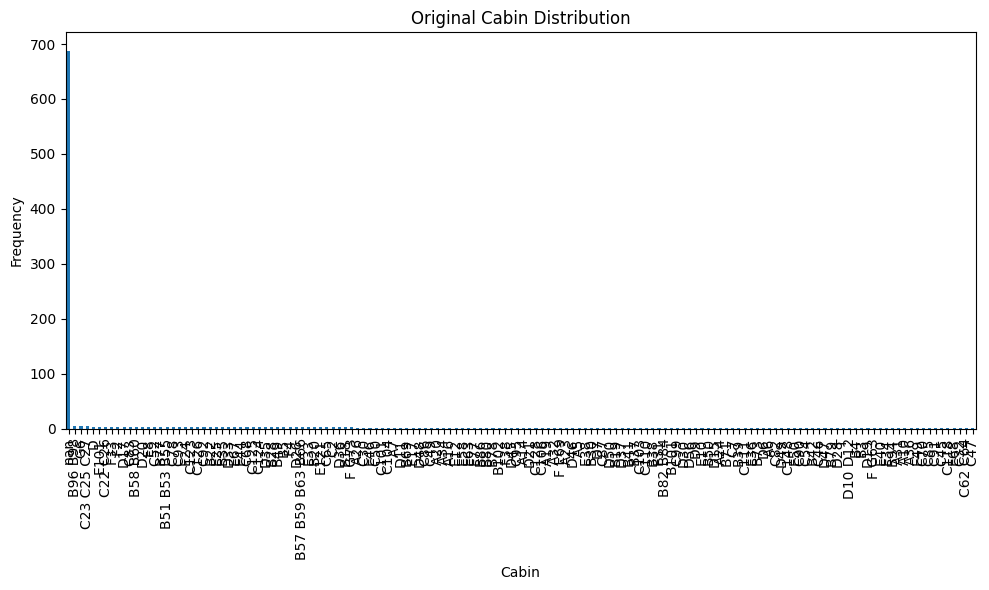


Processed distribution:
Cabin_processed
NaN       687
Others    204
Name: count, dtype: int64


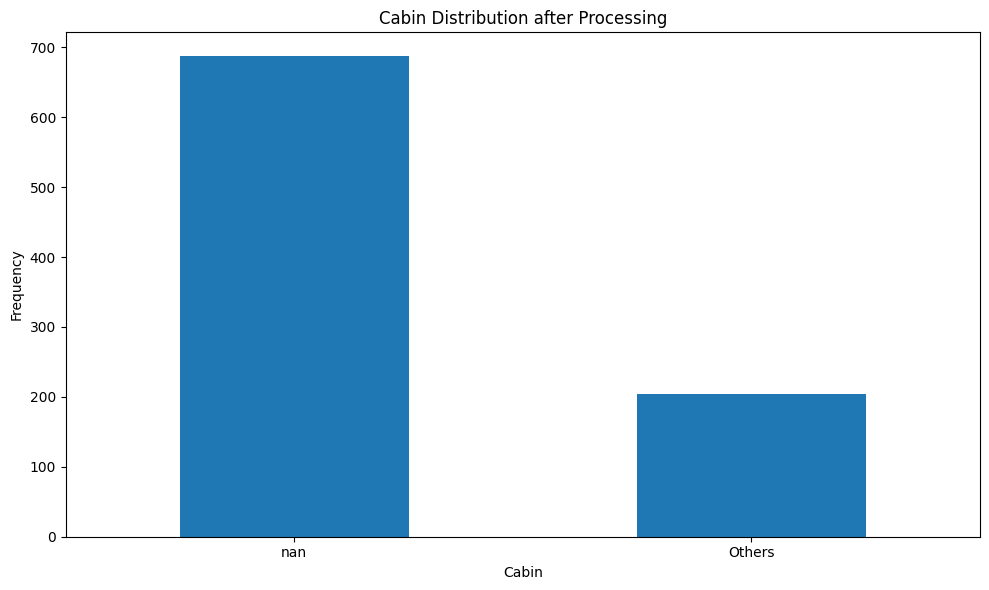

In [36]:
cabin_counts = data['Cabin'].value_counts(dropna=False)
print("Original distribution:")
print(cabin_counts)

plt.figure(figsize=(10, 6))
cabin_counts.plot(kind='bar')
plt.xlabel('Cabin')
plt.ylabel('Frequency')
plt.title('Original Cabin Distribution')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

#since there are too much categories, I decided to integrate all the categories into the one called 'others'
data['Cabin_processed'] = data['Cabin'].apply(lambda x: 'Others' if pd.notna(x) else np.nan)
cabin_counts_processed = data['Cabin_processed'].value_counts(dropna=False)
print("\nProcessed distribution:")
print(cabin_counts_processed)

plt.figure(figsize=(10, 6))
cabin_counts_processed.plot(kind='bar')
plt.xlabel('Cabin')
plt.ylabel('Frequency')
plt.title('Cabin Distribution after Processing')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

6-4. (Optional)

Sibsp는 # of siblings / spouses aboard the Titanic, Parch는 # of parents / children abroad the Titanic 입니다. Sibsp 변수와 Parch 중 Survived 변수 중 Survived 여부에 영향을 끼치는 하나의 변수를 선택한다면 무엇을 선택할 것이며, 그 이유가 무엇인가요?

#### 6-B. Numpy

6-5. 아래 lst와 같이 주어진 행렬이 있습니다. 해당 3x3 행렬을 4x2x2 tensor로 변환해주세요. 각각의 2x2 행렬은 좌측 상단 / 좌측 하단 / 우측 상단 / 우측 하단을 뜻합니다.

In [37]:
import numpy as np

lst = [
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]
]

arr = np.array(lst)
reshaped = np.array([
    arr[:2, :2],
    arr[1:, :2],
    arr[:2, 1:],
    arr[1:, 1:]
])
print(reshaped)

[[[1 2]
  [4 5]]

 [[4 5]
  [7 8]]

 [[2 3]
  [5 6]]

 [[5 6]
  [8 9]]]


6-6. Unifrom Distribution으로부터 Sampling한 100개의 점과 Gaussian Distribution으로부터 Sampling한 100개의 점의 분포를 시각화해주세요. 시각화 시 plot에 각 분포의 평균/중앙값을 점선으로 함께 시각화해주세요.

1. uniform distribution은 (0, 1) 범위로, gaussian은 mean이 0, std가 1입니다.
2. 해당 문제에서 사용할 수 있는 라이브러리는 Numpy와 Matplotlib로 제한합니다.

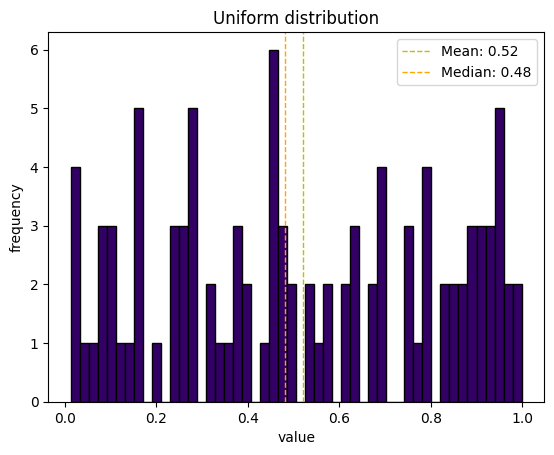

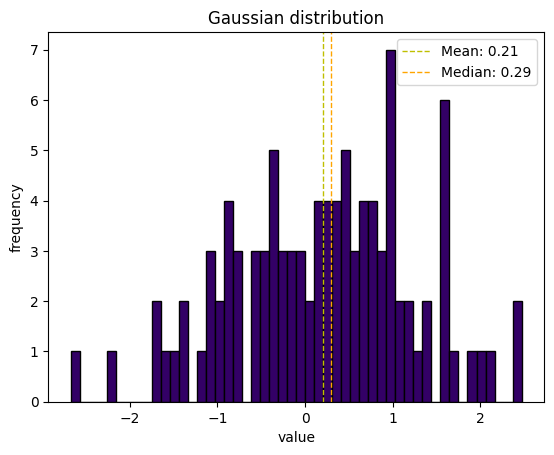

In [38]:
# 1. Uniform Distribution Sampling
uniform_samples = np.random.uniform(0, 1, 100)

# 2. Gaussian Distribution Sampling
mean = 0  # 평균
variance = 1  # 분산
std_dev = np.sqrt(variance)  # 표준편차
num_points = 100  # 샘플 개수
gaussian_samples = np.random.normal(loc=mean, scale=std_dev, size=num_points)

# 3. 시각화

# Uniform Distribution
plt.hist(uniform_samples, bins=50, color='#330066', edgecolor='k')
plt.title('Uniform distribution')
plt.xlabel('value')
plt.ylabel('frequency')

# 4. 평균/중앙값 점선으로 시각화
uniform_mean = np.mean(uniform_samples)
uniform_median = np.median(uniform_samples)

plt.axvline(uniform_mean, color='y', linestyle='dashed', linewidth=1, label=f'Mean: {uniform_mean:.2f}')
plt.axvline(uniform_median, color='orange', linestyle='dashed', linewidth=1, label=f'Median: {uniform_median:.2f}')
plt.legend()
plt.show()

# Gaussian Distribution
plt.hist(gaussian_samples, bins=50, color='#330066', edgecolor='k')
plt.title('Gaussian distribution')
plt.xlabel('value')
plt.ylabel('frequency')

# 4. 평균/중앙값 점선으로 시각화
gaussian_mean = np.mean(gaussian_samples)
gaussian_median = np.median(gaussian_samples)

plt.axvline(gaussian_mean, color='y', linestyle='dashed', linewidth=1, label=f'Mean: {gaussian_mean:.2f}')
plt.axvline(gaussian_median, color='orange', linestyle='dashed', linewidth=1, label=f'Median: {gaussian_median:.2f}')
plt.legend()
plt.show()